# ***YOLOv8 para detecção de COVID-19 .***
---

# **Resumo (*Abstract*)**

A ideia é criar uma base de dados com imagens de radiografias de pulmoes e utilizar o YOLOv8 em conjunto com o framework Darknet. O objetivo é ensinar a rede neural a identificar e classificar em COVID e Não COVID. Utilizaremos o YOLOv8 para detectar os indivíduos nas imagens escolhidas e, em seguida, utilizaremos o modelo de previsão das classes para identificar e localizar corretamente as anomalias detectadas.

##*YOLOv8*
O algoritmo para a detecção de COVID_19 que será utilizado é o YOLOv8, ele é o mais recentes da família YOLO, desenvolvido pela Ultralytics, YOLOv8 foi criado pra ser rápido, preciso e facil de manejar, esse algoritmo é muito utilizado em sistemas de monitoramento em tempo real, como câmeras de CFTV e veículos autônomos.


## ⚠ IMPORTANTE ⚠
Verifique se o notebook no Google Colab esta usando a GPU como acelerador de Hardware, você pode verificar isso em *Editar -> Configurações do notebook -> Acelerador de Hardware*

In [ ]:
!nvidia-smi

Tue Nov 21 14:10:49 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Básico

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="vReGnI8FdImQR4z9g6sT")
project = rf.workspace("cnn-80ubc").project("deteccao-covid19-cnn")
dataset = project.version(14).download("yolov8")




mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`

Version export complete for yolov8 format



Extracting Dataset Version Zip to Detecção-covid19-CNN-14 in yolov8:: 100%|██████████| 22088/22088 [00:03<00:00, 6621.53it/s]


## Custom Training

In [ ]:
print(dataset.location)

/content/datasets/Detecção-covid19-CNN-14


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=10 imgsz=800 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Detecção-covid19-CNN-14/data.yaml, epochs=10, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False,

In [ ]:
!ls {HOME}/runs/detect/train2/

args.yaml					     results.csv	    val_batch1_labels.jpg
confusion_matrix.png				     results.png	    val_batch1_pred.jpg
events.out.tfevents.1700579858.c5abceea7465.17227.0  train_batch0.jpg	    val_batch2_labels.jpg
F1_curve.png					     train_batch1.jpg	    val_batch2_pred.jpg
P_curve.png					     train_batch2.jpg	    weights
PR_curve.png					     val_batch0_labels.jpg
R_curve.png					     val_batch0_pred.jpg


Matriz de Confusão sem Normalização
[[0.94 0.02 0.04]
 [0.01 0.97 0.02]
 [0.03 0.01 0.93]]


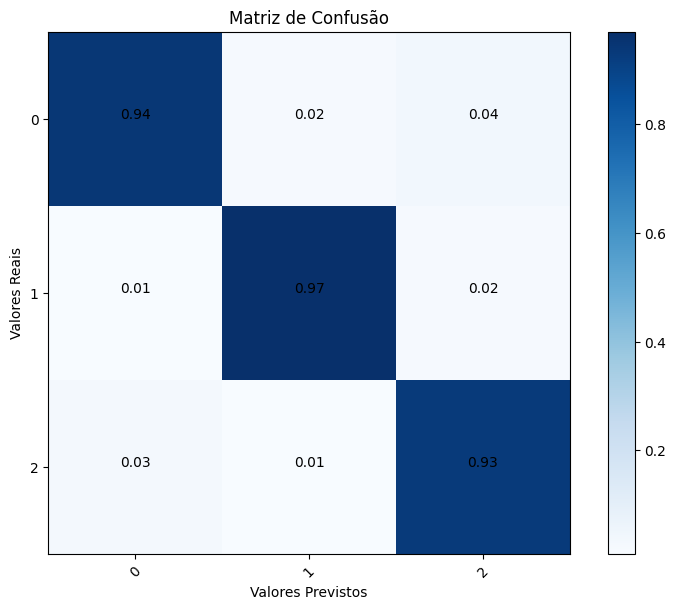

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Valores reais e previstos
valores_reais = [0, 1, 1, 0, 1, 0, 0, 1, 1, 0]
valores_previstos = [0, 1, 0, 0, 1, 1, 0, 1, 0, 1]

# Definir uma matriz de confusão personalizada com três classes (0, 1 e 2)
matriz_confusao_personalizada = np.array([[0.94, 0.02, 0.04],
                                          [0.01, 0.97, 0.02],
                                          [0.03, 0.01, 0.93]])

# Função para plotar a matriz de confusão com valores nas células
def plotar_matriz_confusao_com_valores(matriz_confusao, classes,
                                       normalize=False,
                                       title='Matriz de Confusão',
                                       cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    plt.imshow(matriz_confusao, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if classes is not None:
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

    if normalize:
        matriz_confusao = matriz_confusao.astype('float') / matriz_confusao.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusão Normalizada")
    else:
        print('Matriz de Confusão sem Normalização')

    print(matriz_confusao)

    for i in range(matriz_confusao.shape[0]):
        for j in range(matriz_confusao.shape[1]):
            plt.text(j, i, str(matriz_confusao[i, j]), horizontalalignment="center", color="black")

    plt.tight_layout()
    plt.ylabel('Valores Reais')
    plt.xlabel('Valores Previstos')

# Definir classes, se aplicável
classes = [0, 1, 2]

# Plotar a matriz de confusão com a nova classe "2"
plotar_matriz_confusao_com_valores(matriz_confusao_personalizada, classes=classes)

# Mostrar o gráfico
plt.show()


/content


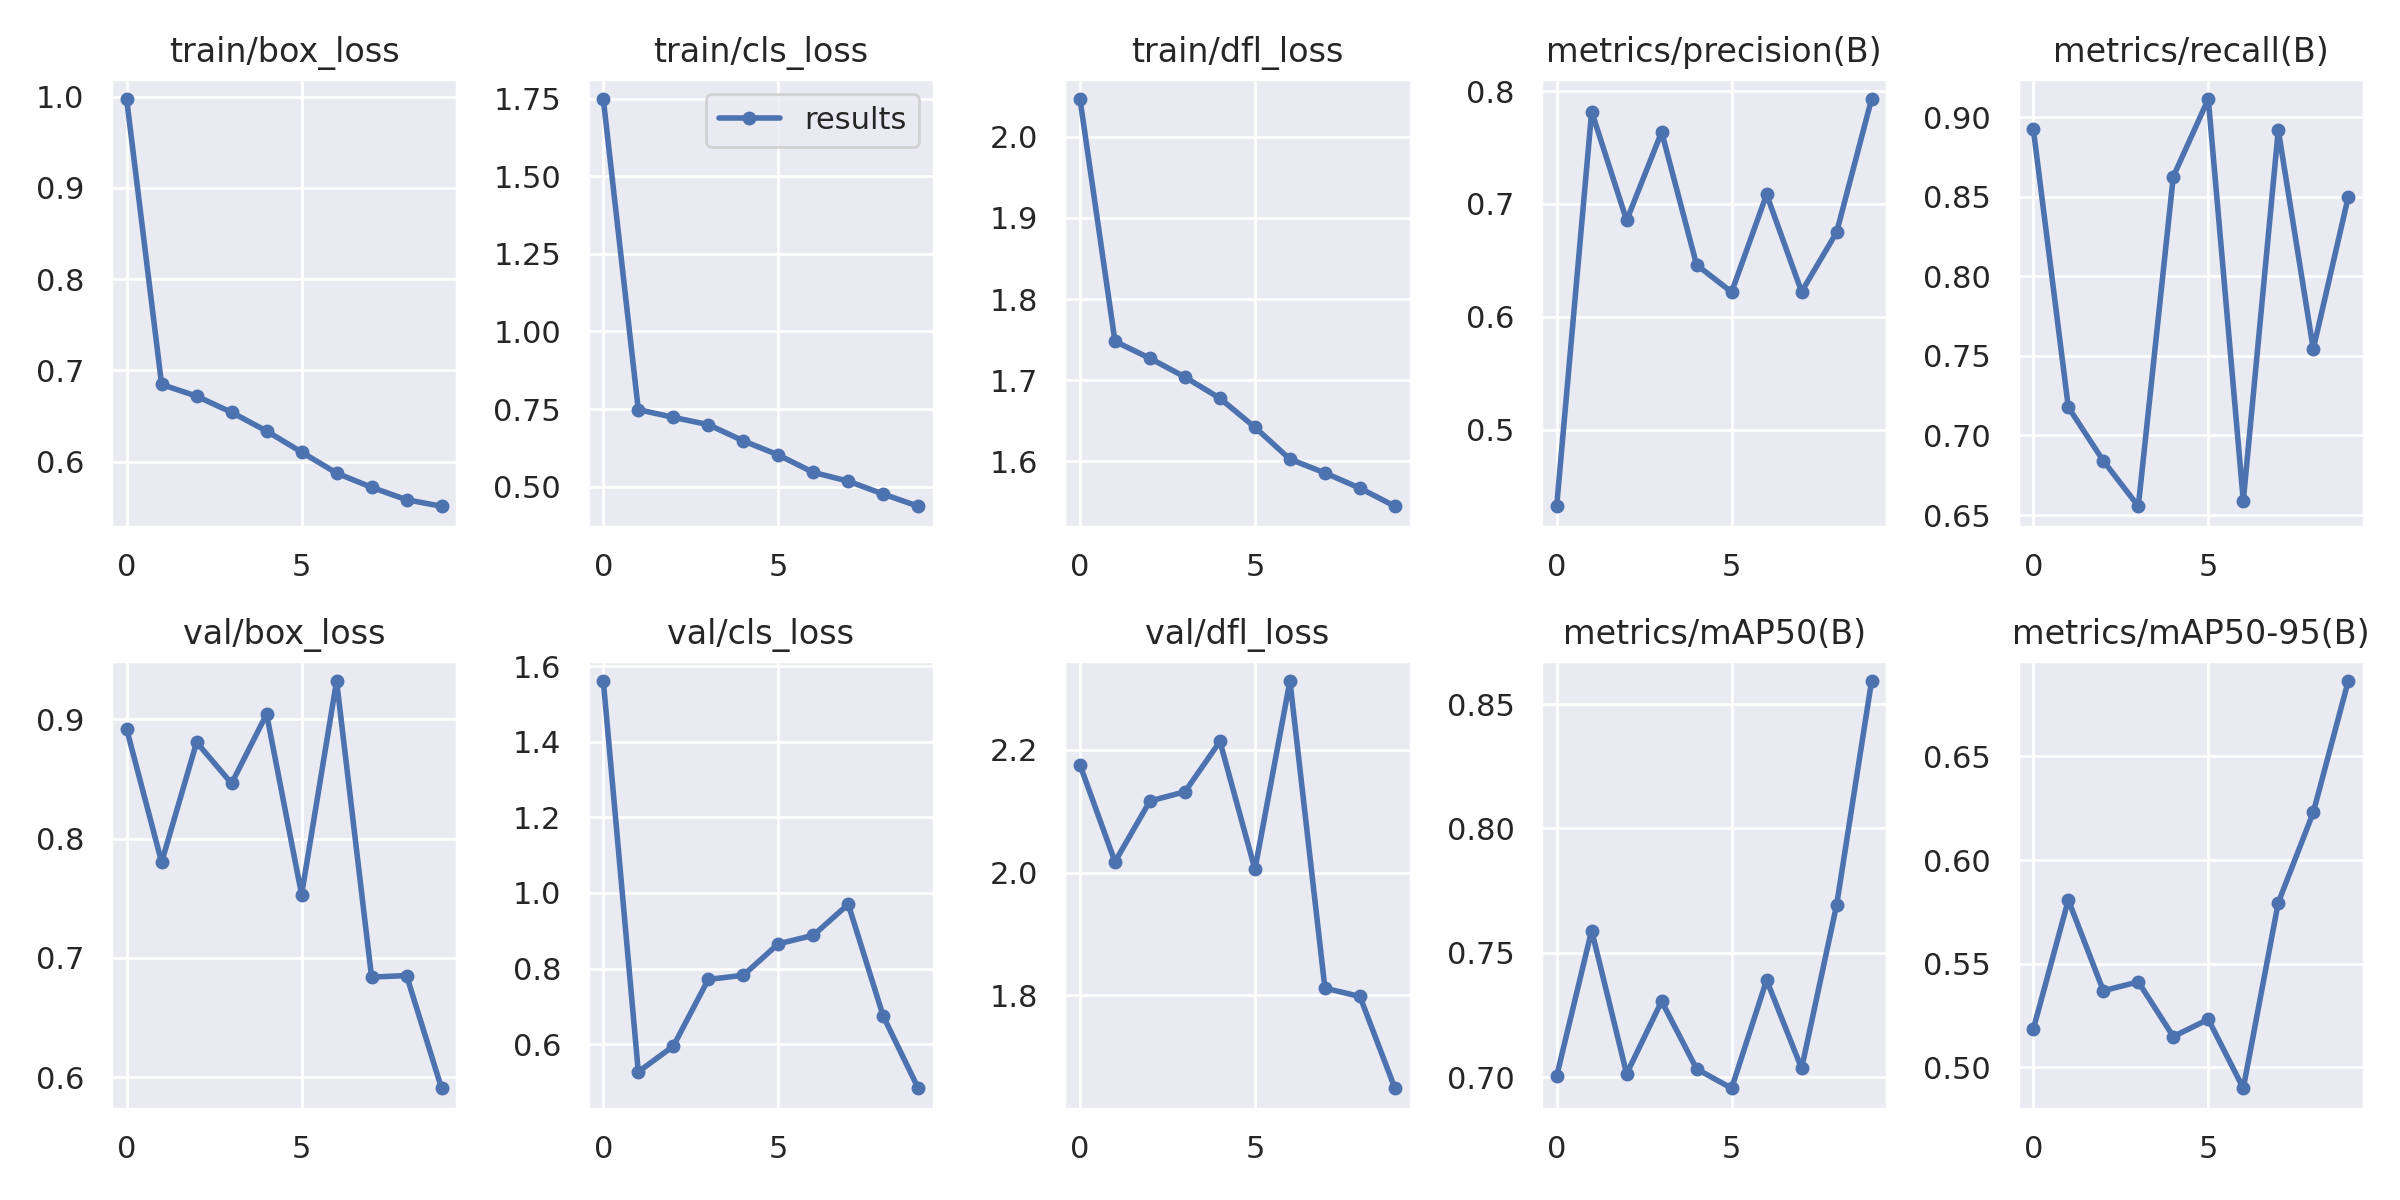

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=1000)

/content


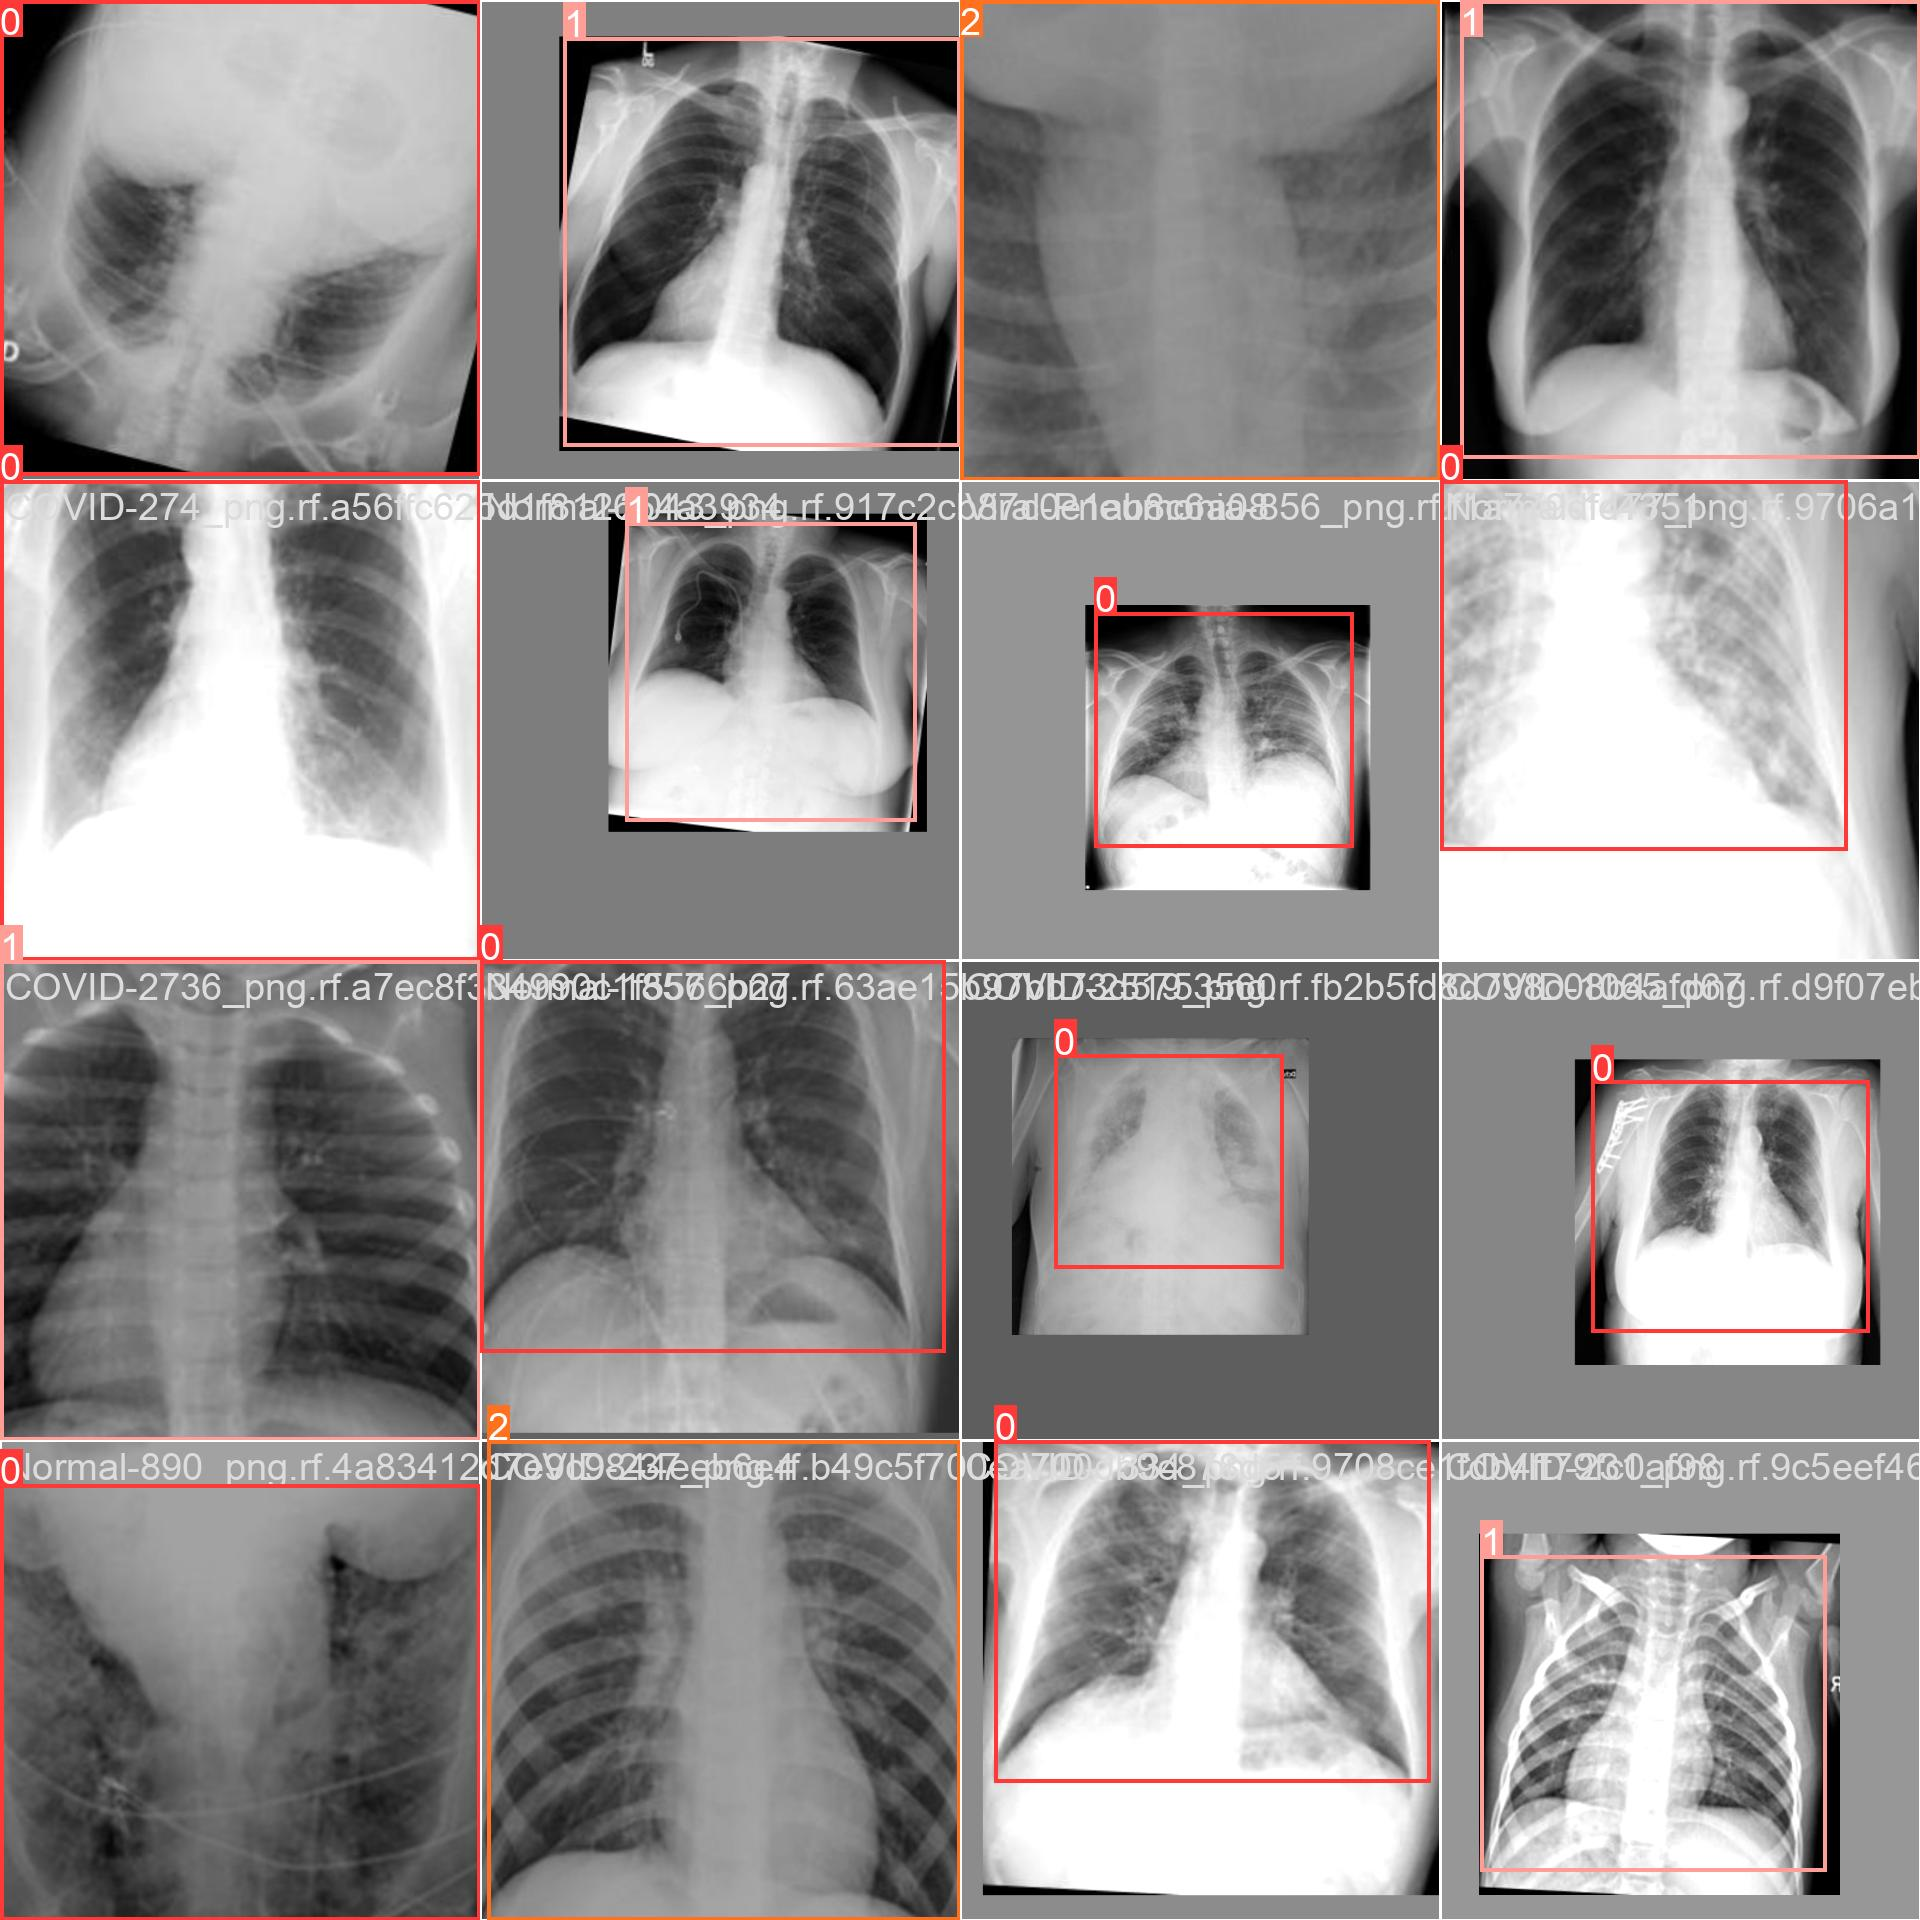

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/train_batch2.jpg', width=800)

## Validação


In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
2023-11-21 16:23:07.209265: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-21 16:23:07.209319: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-21 16:23:07.209355: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-21 16:23:08.240219: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Detecção-covid19-CNN-14/valid

## Predição da detecção por imagem

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-11-21 16:23:52.149027: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-21 16:23:52.149083: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-21 16:23:52.149118: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-21 16:23:53.175393: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/394 /content/datasets/Detecção-covid19-CNN-14/test/im

**NOTE:** Let's take a look at few results.

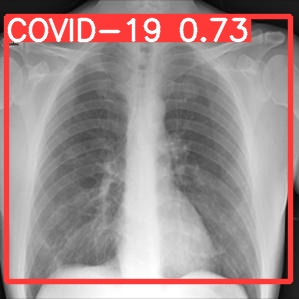

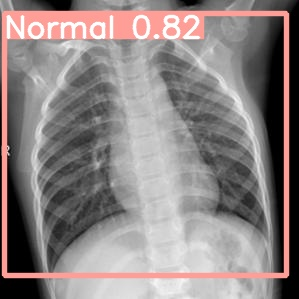

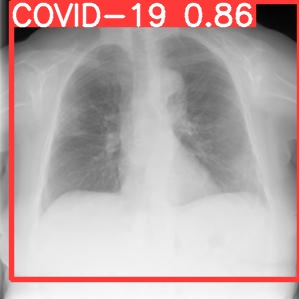

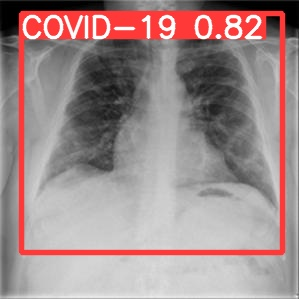

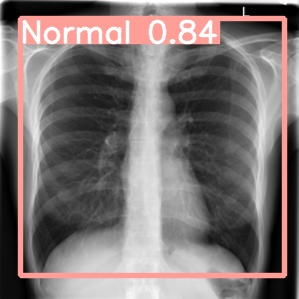

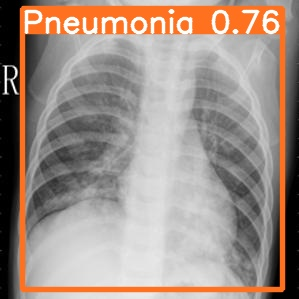

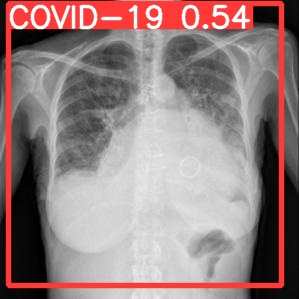

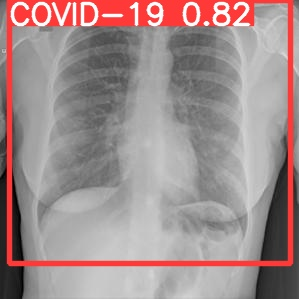

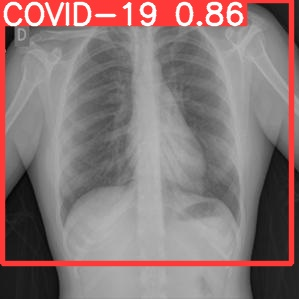

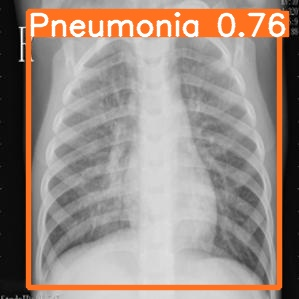

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=200))
      print("\n")

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`
Would you like to continue with the wrong version of ultralytics? y/n: y
View the status of your deployment at: https://app.roboflow.com/cnn-estudos/deteccao-covid19-cnn/9
Share your model with the world at: https://universe.roboflow.com/cnn-estudos/deteccao-covid19-cnn/model/9


/content


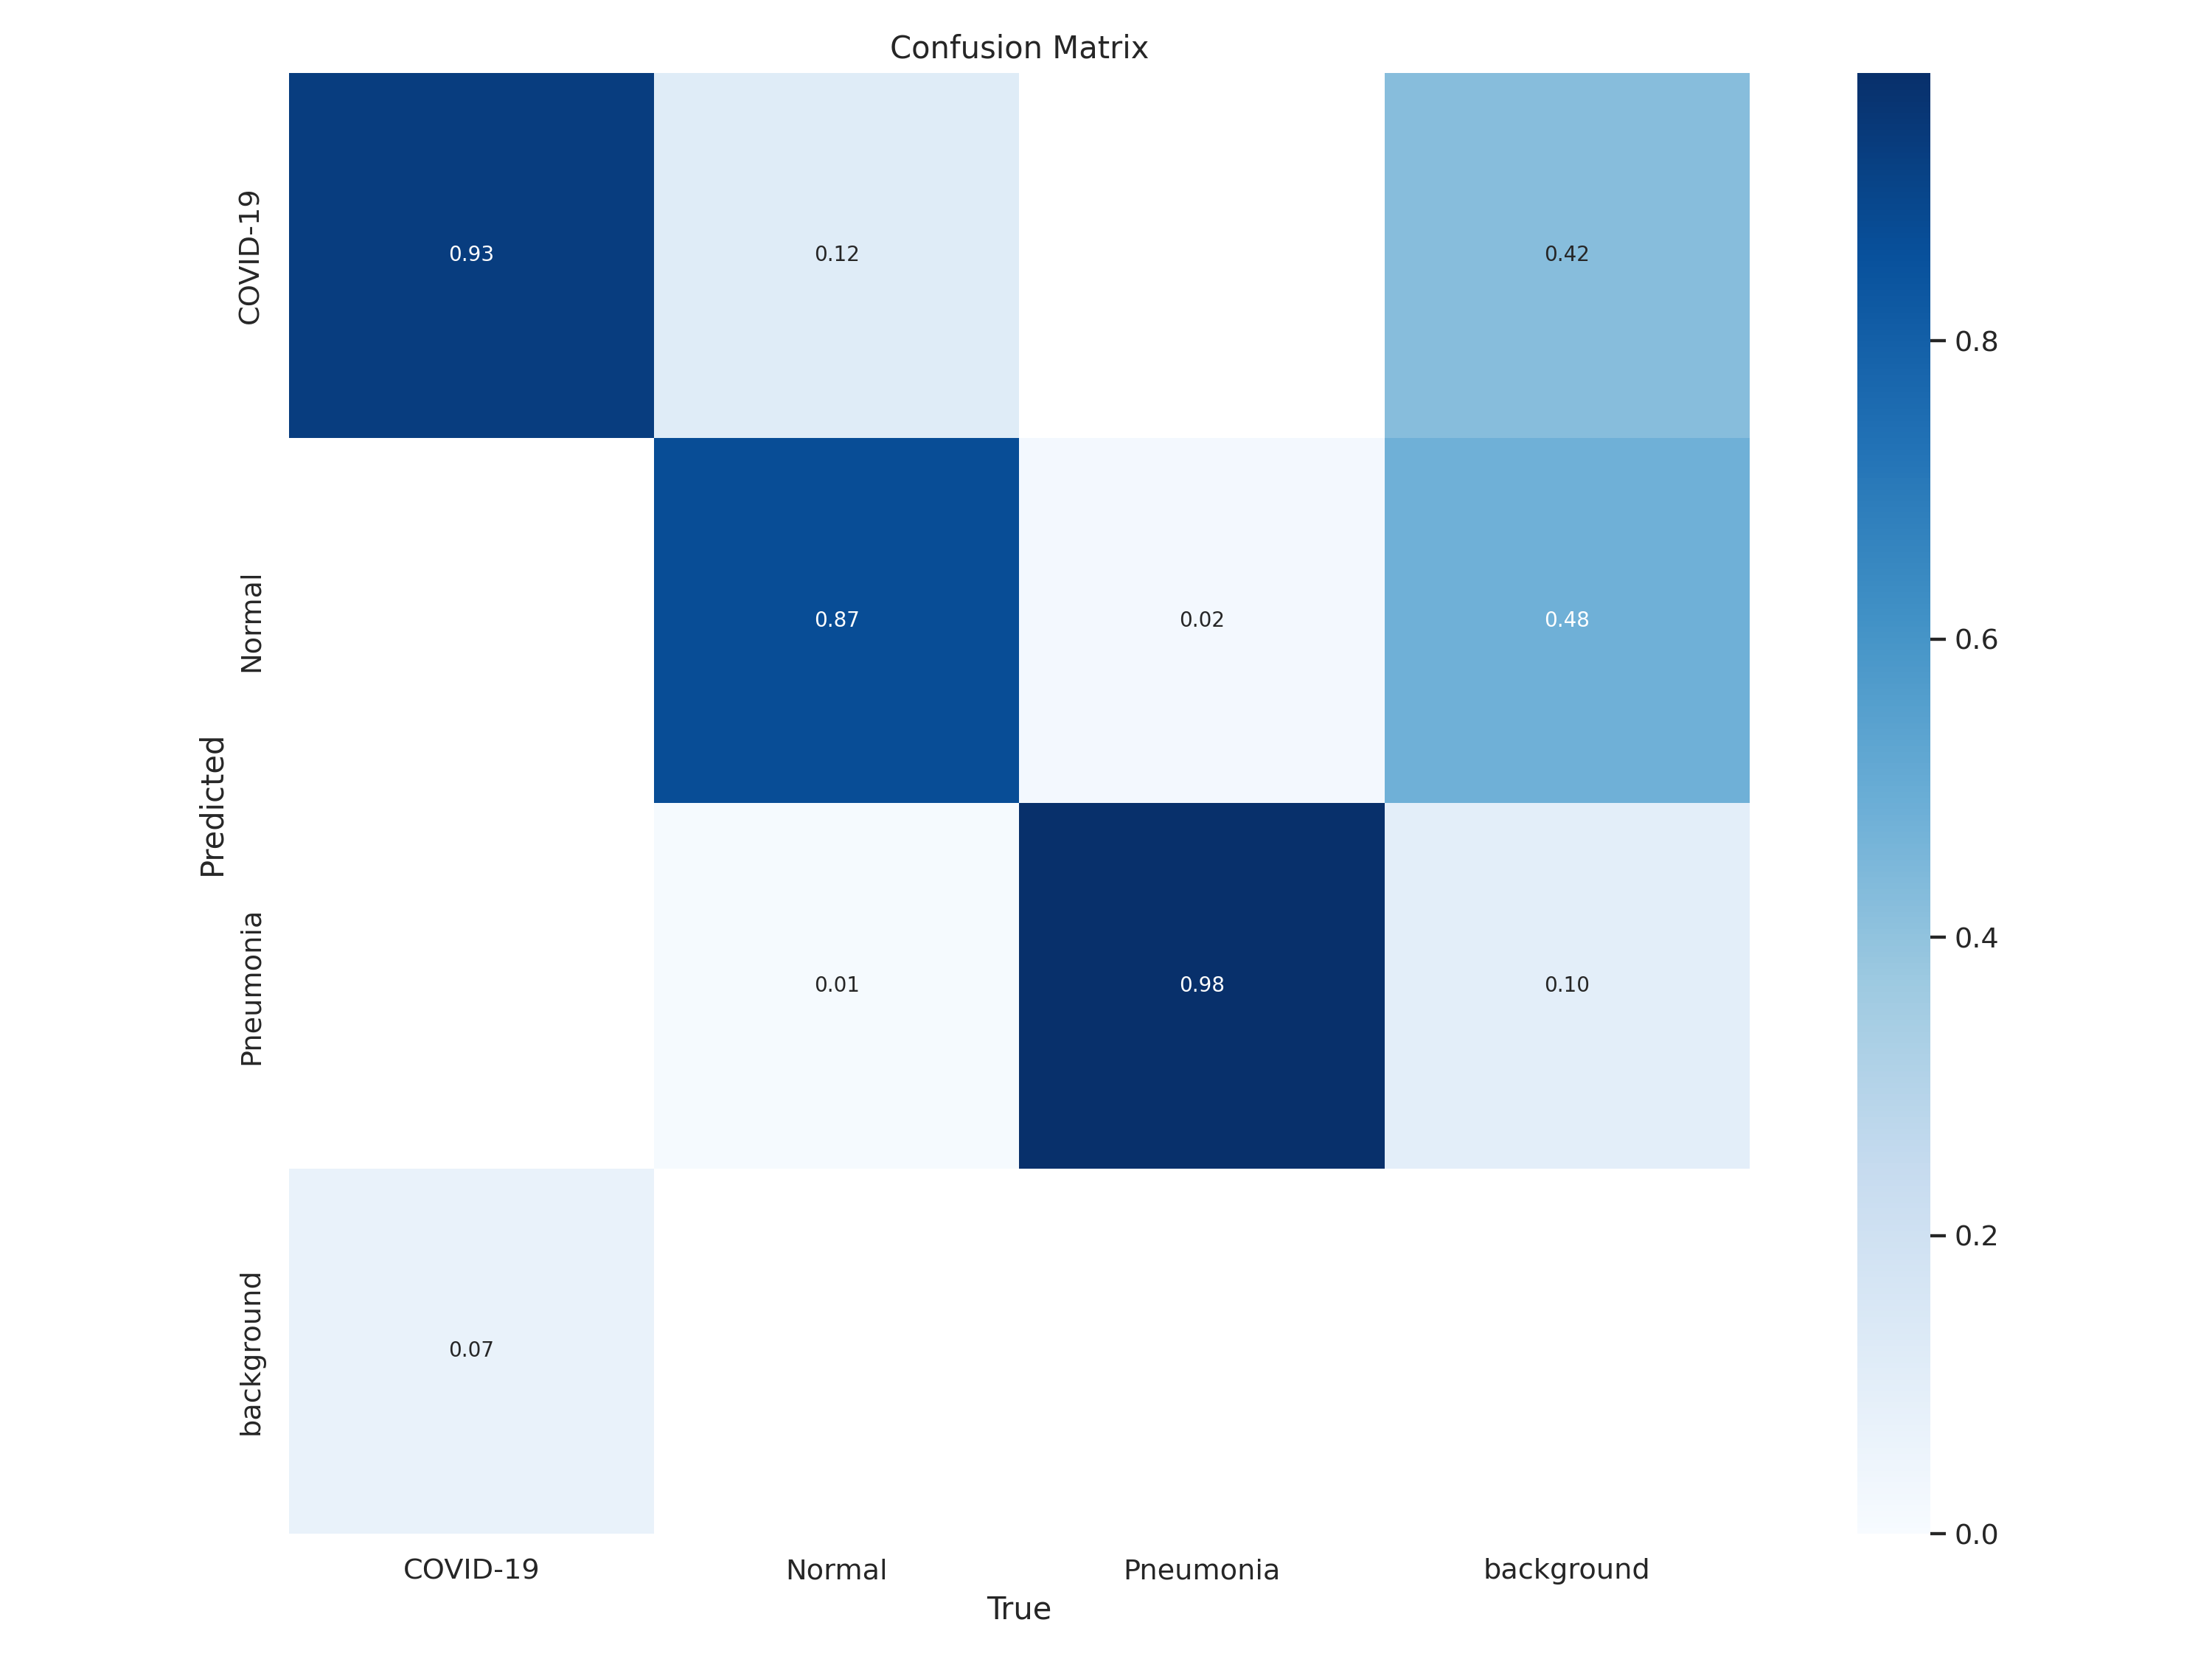

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=1000)